In [2]:
import matplotlib.pyplot as plt
import numpy as np

# $k$阶近邻算法（$k$-Nearest Neighbor, $k$NN）


<TABLE><TR>
    <TD>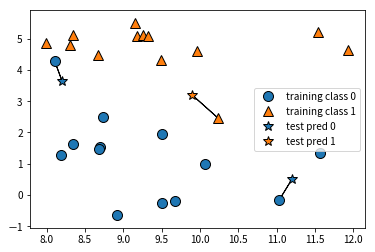</TD>
    <TD>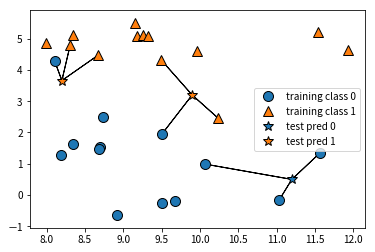</TD>
</TR></TABLE>

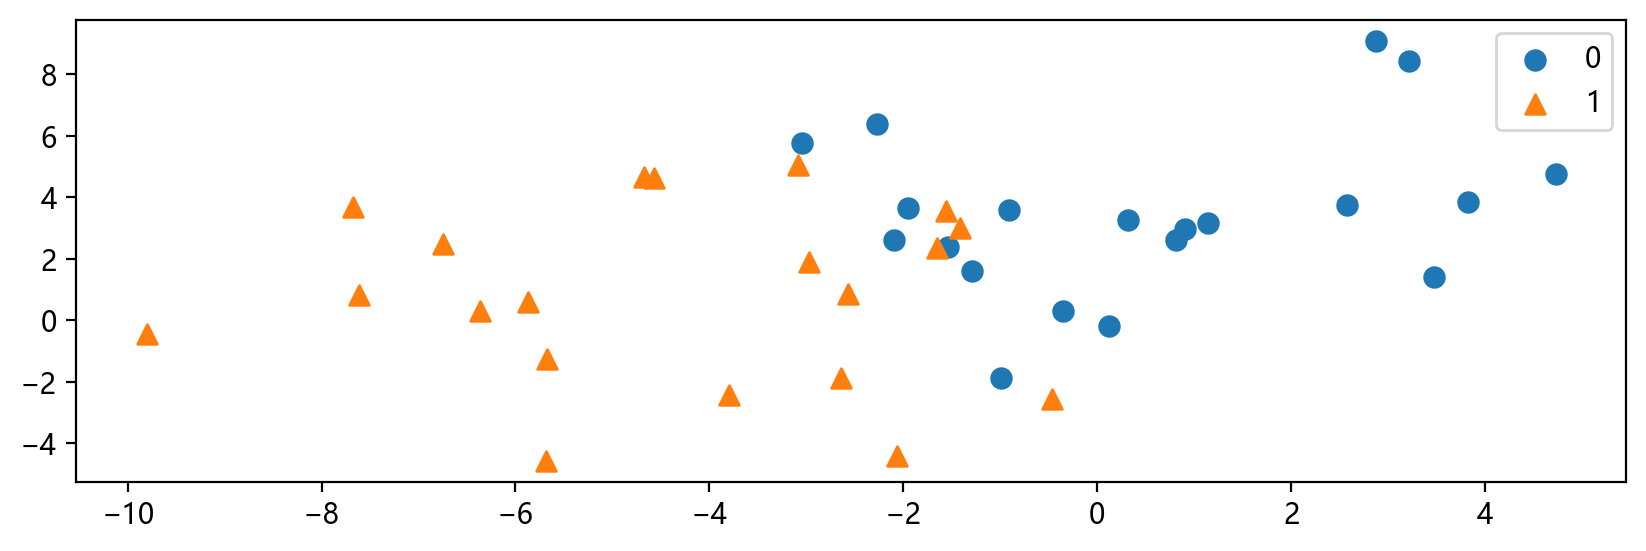

In [9]:
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances

X, y = make_blobs(centers=2, n_samples=40, cluster_std=2.5, random_state=3)

plt.figure(figsize=(10,3), dpi=200)
plt.scatter(X[y==0, 0], X[y==0, 1], marker="o", label="0", s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], marker="^", label="1", s=50)

#for i, marker in zip([0, 1], ['o', '^']):
#    plt.scatter(X[y==i, 0], X[y==i, 1], marker=marker, label=f"{i}", s=50)

plt.legend();

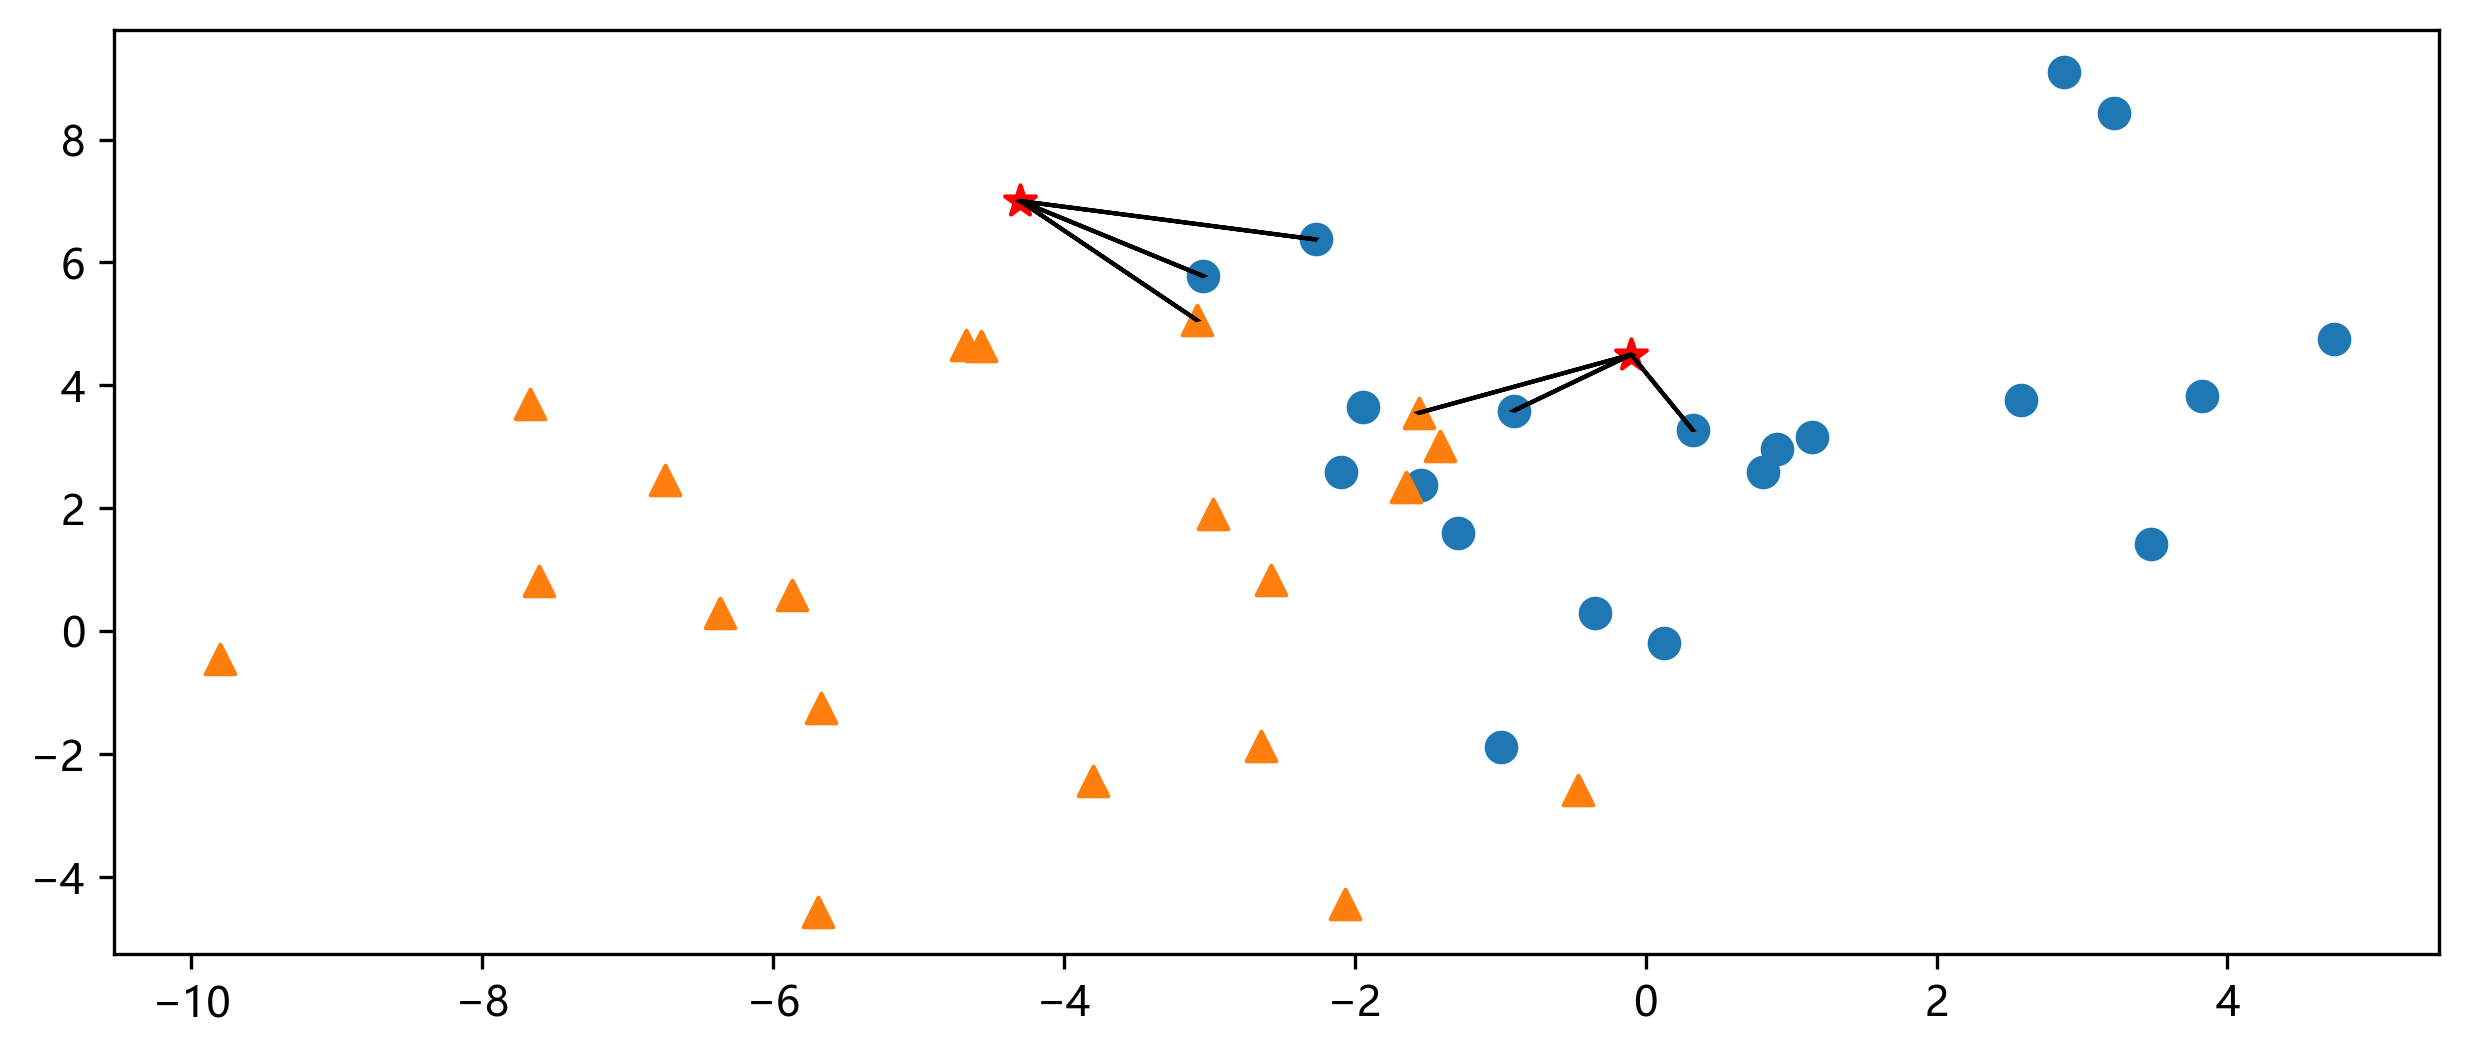

In [10]:
from sklearn.metrics import euclidean_distances


plt.figure(figsize=(10,4), dpi=300)
for i, marker in zip([0, 1], ['o', '^']):
    plt.scatter(X[y==i, 0], X[y==i, 1], marker=marker, s=50)

X_test = np.array([[-4.3, 7], [-0.1, 4.5]])
plt.scatter(X_test[:, 0], X_test[:, 1], marker='*', c='r', s=60)

n_neighbors = 3

dist = euclidean_distances(X, X_test) # 计算各点到这两测试点的欧式距离
closest = np.argsort(dist, axis=0)[:n_neighbors, :]

for x, neighbors in zip(X_test, closest.T):
    for neighbor in neighbors:
        plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                  X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

## 考察一下$k$的选择

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
y[np.array([7, 27])] = 0
mask = np.ones(len(X), dtype=bool)
mask[np.array([0, 1, 5, 26])] = 0
X, y = X[mask], y[mask]

In [17]:
X.shape

(26, 2)

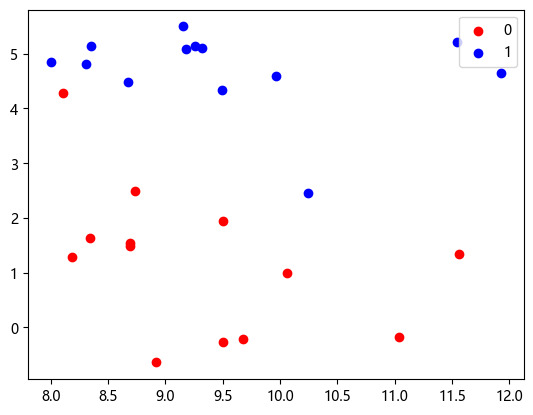

In [12]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="0")
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="1")
plt.legend()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

model.predict(np.array([[8.2, 4.5]]))

array([1])

In [23]:
np.array([[1,2],[3,4]]).ravel()

array([1, 2, 3, 4])

In [14]:
from plot_helper import plot_2d_separator

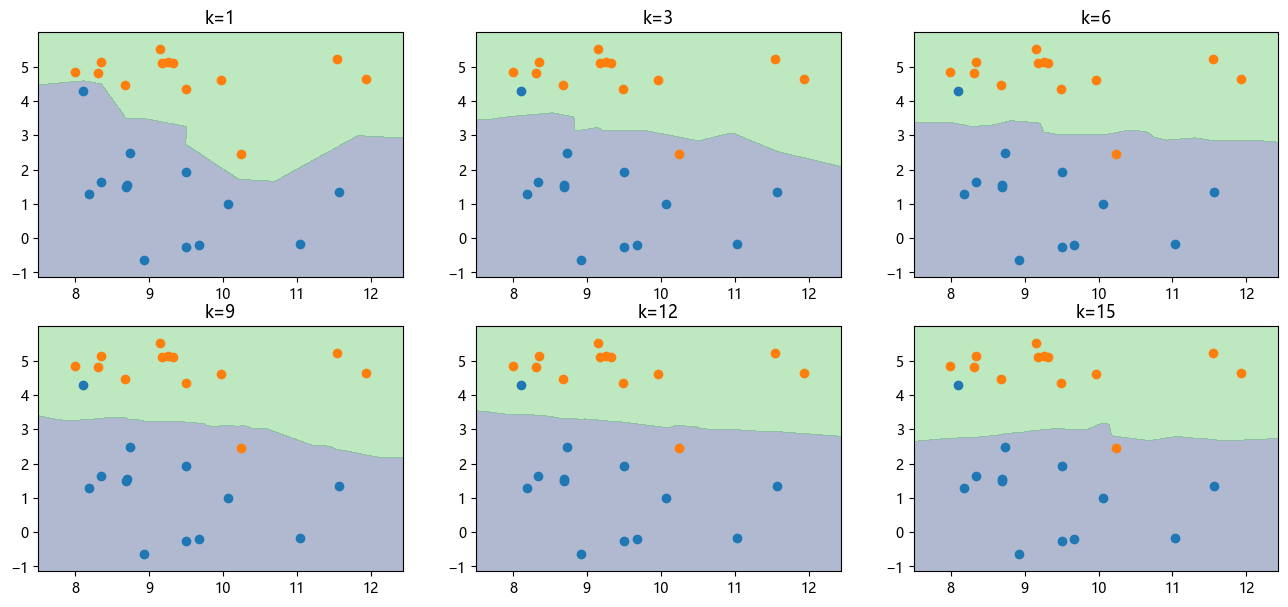

In [15]:
from plot_helper import plot_2d_separator
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(2, 3, figsize=(16, 7), dpi=100)
axes = axes.ravel()

n_neighbors = [1, 3, 6, 9, 12, 15]
for i in range(6):
    ax = axes[i]
    clf = KNeighborsClassifier(n_neighbors=n_neighbors[i])
    clf.fit(X, y)
    plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.scatter(X[y==0, 0], X[y==0, 1])
    ax.scatter(X[y==1, 0], X[y==1, 1])
    ax.set_title(f"k={n_neighbors[i]}")
    # ax.set_xlabel("feature 0")
    # ax.set_ylabel("feature 1")

#### 使用乳腺癌数据

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)


In [19]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
    
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))


0.9483568075117371
0.9230769230769231


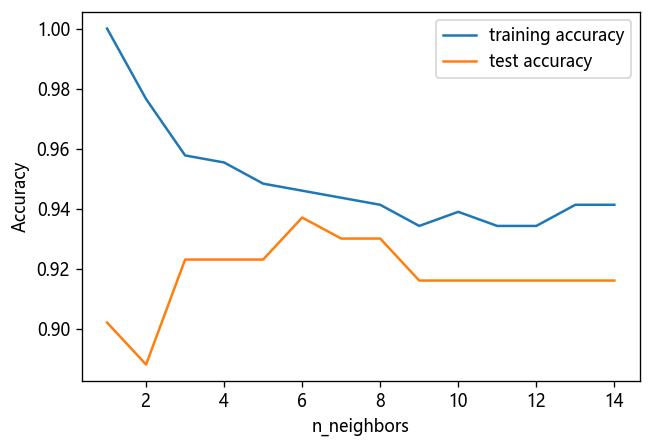

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


training_accuracy = []
test_accuracy = []


neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings :
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    score = accuracy_score(y_train, clf.predict(X_train))
    training_accuracy.append(score)

    score = accuracy_score(y_test, clf.predict(X_test))
    test_accuracy.append(score)

    
plt.figure(figsize=(6,4), dpi=120)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

# 模型复杂性和表达能力

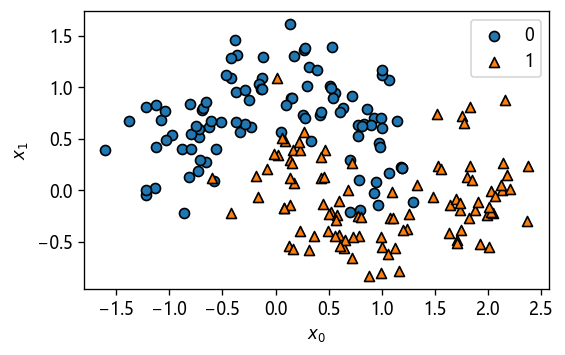

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

plt.figure(figsize=(5, 3), dpi=120)
plt.scatter(X[y==0,0], [X[y==0,1]], label="0",ec="k")
plt.scatter(X[y==1,0], [X[y==1,1]], marker="^", label="1", ec="k")
plt.xlabel("$x_0$"); plt.ylabel("$x_1$")
plt.legend();


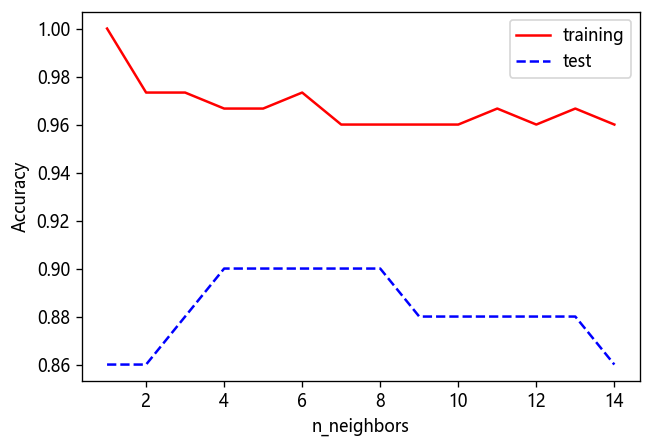

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=23)

training_accuracy = []
test_accuracy = []

for n_neighbors in range(1, 15) :
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    score = accuracy_score(y_train, train_pred)
    training_accuracy.append(score)
    
    test_pred = clf.predict(X_test)
    score = accuracy_score(y_test, test_pred)
    test_accuracy.append(score)

plt.figure(figsize=(6,4), dpi=120)
plt.plot(neighbors_settings, training_accuracy, label="training", c="red")
plt.plot(neighbors_settings, test_accuracy, label="test", c="blue", ls="--")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
# plt.ylim(0.8,1)
plt.legend();